In [1]:
from mle import negative_log_lik, CGMY
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=2, suppress=False)

In [3]:
df_np = pd.read_csv("../data/S&P500_price.csv")
df_np.index = pd.to_datetime(df_np["Date"])
df_np = df_np.sort_index()
snp_rets = np.log(df_np["Last Price"]).diff().dropna()

In [4]:
data = snp_rets.values
res = minimize(
    lambda x: negative_log_lik(x, data),
    x0=[10, 10, 10, 10**-3, 0.001],
    bounds=[
        (1e-3, np.inf),
        (1, np.inf),
        (1, np.inf),
        (1e-3, 1),
        (0.000001, 1),
    ],
    method="Nelder-Mead",
)

res2 = minimize(
    lambda x: negative_log_lik(x, data),
    x0=[100, 100, 100, 0.1, 0.001],
    bounds=[
        (10 ** (-3), np.inf),
        (1, np.inf),
        (1, np.inf),
        (1e-3, 1),
        (0.000001, 1),
    ],
    method="Nelder-Mead",
)

res3 = minimize(
    lambda x: negative_log_lik(x, data),
    x0=[3, 3, 3, 10**-3, 0.001],
    bounds=[
        (10 ** (-3), np.inf),
        (1, np.inf),
        (1, np.inf),
        (1e-3, 1),
        (0.000001, 1),
    ],
    method="Nelder-Mead",
)

In [5]:
res.x

array([2.03e-02, 1.71e+01, 9.46e+01, 1.22e-03, 9.46e-03])

In [6]:
res2.x

array([1.09e-01, 1.21e+02, 1.11e+02, 4.43e-01, 1.00e-06])

In [7]:
res3.x

array([4.26e-02, 3.19e+01, 5.00e+01, 2.73e-03, 8.95e-03])

In [8]:
res.fun

np.float64(-3922.3829871367766)

In [9]:
res2.fun

np.float64(-3943.194596994979)

In [23]:
res3.fun

np.float64(-3933.038606902148)

In [10]:
cgmy_fitted2 = CGMY(data, [7.789711845562872,
 67.17959263000856,
 94.95981317068947,
 1.8695502184542019,
 0.0006538602842829902], adjust_L=True)
x2, pdf2 = cgmy_fitted2.compute_pdf_from_cf()

In [11]:
cgmy_fitted2.L

np.float64(1235.5468529079014)

In [12]:
cgmy_fitted2.L

np.float64(1235.5468529079014)

In [13]:
l = cgmy_fitted2.L
n = cgmy_fitted2.N

In [14]:
(-0.003607	 + l/2) * n / l

np.float64(131071.234708578)

In [15]:
x2[131071]

np.float64(-0.004713237201372067)

In [16]:
cgmy_fitted2.density.assign(val= lambda u: x2[u["interval"]])

,rets,interval,val
0,0.008278,131073,0.004713
1,0.018785,131075,0.014140
2,-0.003607,131071,-0.004713
3,0.000594,131072,0.000000
4,-0.005665,131070,-0.009426
...,...,...,...
1249,0.000074,131072,0.000000
1250,-0.005291,131070,-0.009426
1251,0.010228,131074,0.009426
1252,0.000920,131072,0.000000


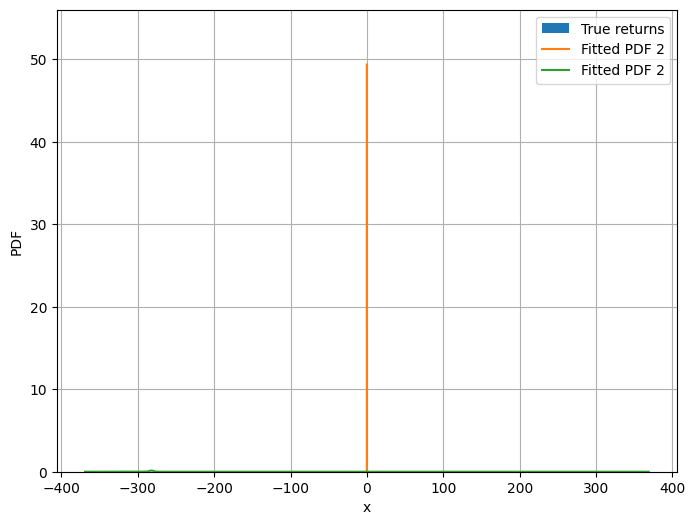

In [30]:
cgmy_fitted = CGMY(data, res["x"], adjust_L=True)
cgmy_fitted2 = CGMY(data, res2["x"], adjust_L=True)
cgmy_fitted3 = CGMY(data, [14.1532802074954,
 286.4927601113419,
 147.23849233959862,
 1.5847657376972388,
 0.0016680027130499104], adjust_L=True)



x, pdf = cgmy_fitted.compute_pdf_from_cf()
x2, pdf2 = cgmy_fitted2.compute_pdf_from_cf()
x3, pdf3 = cgmy_fitted3.compute_pdf_from_cf()

ix = np.abs(x) < 0.1
# Plot the result
plt.figure(figsize=(8, 6))
plt.hist(data, density=True, bins=60, label="True returns")
#plt.plot(x[ix], pdf[ix], label="Fitted PDF 1")
plt.plot(x2, pdf2, label="Fitted PDF 2")
plt.plot(x3, pdf3, label="Fitted PDF 2")

plt.xlabel("x")
plt.ylabel("PDF")
plt.legend()
plt.grid(True)

#plt.savefig("../figures/similar_mle_fits.pdf")

In [18]:
np.abs(pdf2 - pdf).sum() * (x[1] - x[0])  # should be small, close to 0.01

NameError: name 'pdf' is not defined

In [ ]:
from scipy.integrate import quad

In [ ]:
def l(params, data):
    lk = 0
    cgmy = CGMY(data, params)
    
    for x in data:
        lk +=np.real(quad(lambda u: np.exp(-1j * u * x) * cgmy.chara(u), -1000, 1000)[0] / (2 * np.pi))
    return lk


In [ ]:
l([1.39e+00, 1.58e+02, 1.49e+02, 1.75e-03, 4.99e-06], [0.1])

/Users/raphael/Documents/cours/Imperial College/thesis/thesis/.venv/lib/python3.13/site-packages/scipy/integrate/_quadpack_py.py:607: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


-0.008519910551562074

In [ ]:
cgmy = CGMY(snp_rets, [1.39e+00, 1.58e+02, 1.49e+02, 1.75e-03, 4.99e-06])
cgmy.L = 0.5
cgmy.N = 2**15
x, pdf = cgmy.compute_pdf_from_cf()

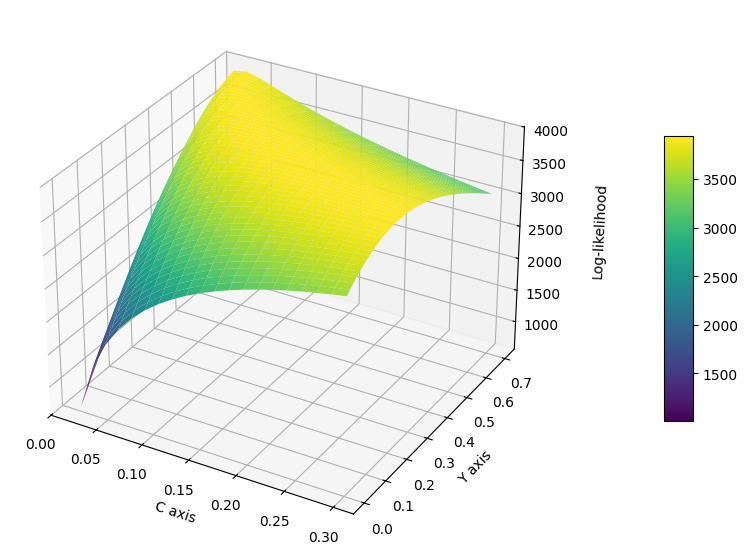

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # not strictly needed in newer matplotlib versions

# chatgpt this figure

# Create a grid of X, Y points
x = np.linspace(2.0e-02, 3.0e-01, 20)
y = np.linspace(2.e-03, 7.e-01, 100)
X, Y = np.meshgrid(x, y)

Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        cgmy = CGMY(data, [x[j], 1.21e+02, 1.11e+02, y[i], 1.00e-06])
        Z[i, j] = cgmy.log_lik()

# Create the figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
#
# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add labels
ax.set_xlabel('C axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Log-likelihood', labelpad=15)

ax.zaxis._axinfo['tick']['inward_factor'] = 0  # no inward movement
ax.zaxis._axinfo['tick']['outward_factor'] = 0.1  # increase to push ticks out

# Add a color bar
cbar = fig.colorbar(surf, shrink=0.5, aspect=10, pad=0.15)
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_position('right')
plt.tight_layout()
#plt.savefig('../figures/lik_surface.pdf')
plt.show()


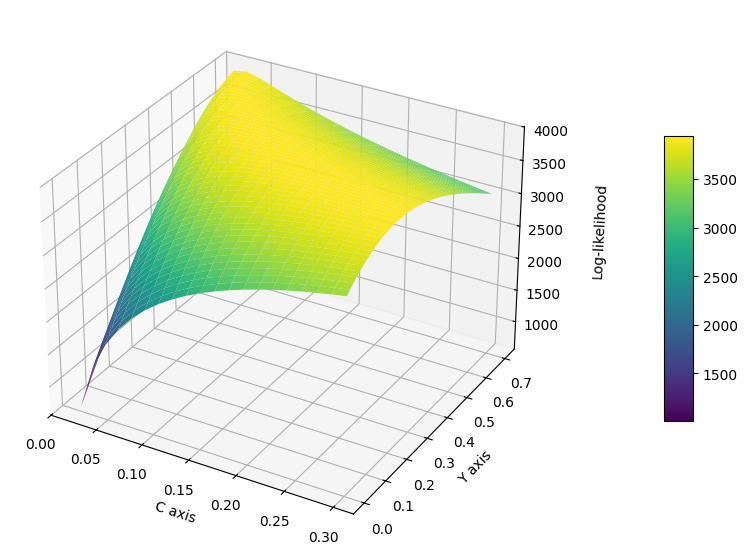

In [52]:
# Create the figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
#
# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Add labels
ax.set_xlabel('C axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Log-likelihood', labelpad=15)

ax.zaxis._axinfo['tick']['inward_factor'] = 0  # no inward movement
ax.zaxis._axinfo['tick']['outward_factor'] = 0.1  # increase to push ticks out

# Add a color bar
cbar = fig.colorbar(surf, shrink=0.5, aspect=10, pad=0.15)
cbar.ax.yaxis.set_ticks_position('right')
cbar.ax.yaxis.set_label_position('right')
plt.tight_layout()
ax.view_init(elev=30, azim=-60)
#plt.savefig('../figures/lik_surface.pdf')
plt.show()